<a href="https://colab.research.google.com/github/PraneshUlleri/colab/blob/master/firstattempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST dataset  : 0 - 9  Handwritten prediction



In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0'

In [0]:
mnist =tf.keras.datasets.mnist

In [5]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt

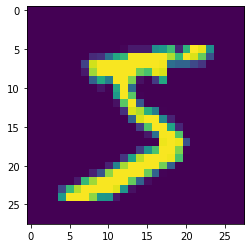

In [8]:
plt.imshow(x_train[0])

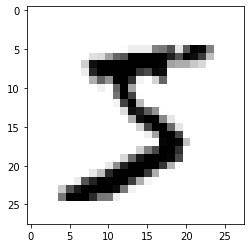

In [10]:
plt.imshow(x_train[0] , cmap=plt.cm.binary)

In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
x_train =tf.keras.utils.normalize(x_train,axis=1)
x_test =tf.keras.utils.normalize(x_test,axis=1)

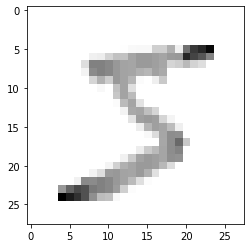

In [15]:
plt.imshow(x_train[0] , cmap=plt.cm.binary)

In [16]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
#building the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9768


In [19]:
val_loss,val_acc =model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9690
0.09846501052379608 0.968999981880188


In [46]:
model.save('firstattempt.model')

INFO:tensorflow:Assets written to: firstattempt.model/assets


In [0]:
new_model = tf.keras.models.load_model('firstattempt.model')

In [52]:
predictions = new_model.predict(x_test)
print (predictions)

[[1.55841395e-10 3.55396459e-08 9.14004090e-08 ... 9.99999523e-01
  4.31886221e-10 3.67357700e-08]
 [2.14804725e-08 1.96386784e-04 9.99792755e-01 ... 1.61282404e-10
  3.03134613e-07 5.72080686e-13]
 [5.15192653e-08 9.99951363e-01 4.75019397e-06 ... 2.47641292e-05
  5.41491090e-06 1.47446464e-08]
 ...
 [1.63283753e-09 3.75875629e-07 4.82429776e-08 ... 9.75444855e-05
  4.68072187e-07 1.19181765e-04]
 [2.73695093e-07 3.36780295e-06 6.27002976e-07 ... 7.55548308e-06
  1.39063131e-03 7.05476211e-09]
 [9.62481181e-07 4.32135607e-08 9.42839506e-07 ... 1.01974962e-09
  3.87830005e-06 3.59709196e-09]]


In [53]:
import numpy as np
print (np.argmax([predictions[0]]))

7


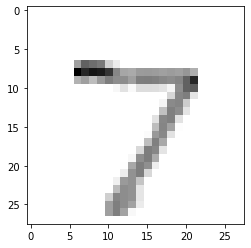

In [57]:
plt.imshow(x_test[0], cmap= plt.cm.binary)